# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Customer Churn

Telecoms company spend a lot on acquiring new customers, the telecoms market is highly competitive at the same time customers are not exactly satisfied with the service provided by most of the telecoms company. Thus, customers leave service providers, when customers leave their current service provider and move to the next this is called churn. 


The problem is simply being to predict the customers that are most likely to leave their current service providers. Classifying customers that will churn based on spending and level of consumption of certain services by the provider using a classification model, would help telecoms prepare and prevent customers from leaving.   
Furthermore,  this is a binary classification problem because it involves categorising the customers in the datasets and future customers, that would churn or won’t churn.


More About The Project Is On Kaggle:  https://www.kaggle.com/c/dsntelecomschurn2018

## Gettting Started


In this project I will be using supervised learning techniques to construct a model that would accurate predict the customers that are going to leave their current service provider for another.

In [2]:
# Importing the basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from time import time
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns

%matplotlib inline

/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Loading the training data
df = pd.read_csv('./TRAIN.csv')

## Exploring The Data

Exploring the data set involves visualizing relationships between the features of customers that churned and customers that didn't churn, correlation between the features and cleaning the data.

In [4]:
# The first row in the data set 
df.head(n=1)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.1,76.714,0.0,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0


### Features Exploration

**- Total Spend in Months 1 and 2 of 2017:** The aggregate spending of a customer in the months July and August 2017.


**- Total SMS Spend:** The aggregate spending on SMS by a customer income earned through the SMS benefit utilized by the subscriber.


**- Total Data Spend:** The aggregate amount spent on Data/Internet by a customer income earned through the SMS service used by the subscriber.


**- Total Data Consumption:** The aggregate data consumed by a customer in KiloBytes during the period under study.


**- Total Unique Calls:** The aggregate of unique calls made by a customer during the period under study.


**- Total Onnet spend:** The aggregate spending of a customer to make on-network calls (on the same network as the subscriber).


**- Total Offnet spend:** The aggregate spending of a customer on off-network calls (not the same network as the subscriber).


**- Customer Tenure in Months:** The time passed since the subscriber started using the services of the network provider and counted in months.


**- Network type subscription in Month 1:** The network type the customer is subscribed  to in the first month which maybe 2G or 3G service.


**- Network type subscription in Month 2:** The network type the customer is subscribed  to in the second month which maybe 2G or 3G service.


**- Total Call centre complaint calls:** Aggregate number of complaints made by the subscribers.


**- Most Loved Competitor network in in Month 1:** The customers most preferred competitor network provider in the first month.


**- Most Loved Competitor network in in Month 2:** The customers most preferred competitor network provider in the second month.

**- Churn Status:** The churn status of a customer, 1 means the customer has churned and 0 means no churn.

In [5]:
df.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000


In [6]:
# Number of customers that churn
churned_customers = df[df['Churn Status'] == 1]
print "Number of customers that churn {}".format(len(churned_customers))

Number of customers that churn 700


In [7]:
# Number of customers that didn't churn
un_churned_customers = df[df['Churn Status'] != 1]
print "Number of customers that didn't churn {}".format(len(un_churned_customers))

Number of customers that didn't churn 701


### Data Processing

The data has to be cleaned and re-formatted in order to get the best performance from our algorithms and also to perform further analysis on the data.

#### Renaming Columns

Some column names have spaces in them and make it hard for performing selecting and performing operations. Changing the columns to underscore naming style makes the code much more readable.

In [8]:
df.columns

Index([u'Customer ID', u'network_age', u'Customer tenure in month',
       u'Total Spend in Months 1 and 2 of 2017', u'Total SMS Spend',
       u'Total Data Spend', u'Total Data Consumption', u'Total Unique Calls',
       u'Total Onnet spend ', u'Total Offnet spend',
       u'Total Call centre complaint calls',
       u'Network type subscription in Month 1',
       u'Network type subscription in Month 2',
       u'Most Loved Competitor network in in Month 1',
       u'Most Loved Competitor network in in Month 2', u'Churn Status'],
      dtype='object')

In [9]:
# Create new column names

df['customer_id'] = df['Customer ID']
df['customer_tenure'] = df['Customer tenure in month']
df['total_spend'] = df['Total Spend in Months 1 and 2 of 2017']
df['total_sms_spend'] = df['Total SMS Spend']
df['total_data_spend'] = df['Total Data Spend']
df['total_data_consumption'] = df['Total Data Consumption']
df['total_unique_calls'] = df['Total Unique Calls']
df['total_onnet_spend'] = df['Total Onnet spend ']
df['total_offnet_spend'] = df['Total Offnet spend']
df['total_complaint_calls'] = df['Total Call centre complaint calls']
df['network_type_subscription_first_month'] = df['Network type subscription in Month 1']
df['network_type_subscription_second_month'] = df['Network type subscription in Month 2']
df['most_loved_competitor_first_month'] = df['Most Loved Competitor network in in Month 1']
df['most_loved_competitor_second_month'] = df['Most Loved Competitor network in in Month 2']
df['churn_status'] = df['Churn Status']

# Delete old column names

df = df.drop('Customer ID', axis=1)
df = df.drop('Customer tenure in month', axis=1)
df = df.drop('Total Spend in Months 1 and 2 of 2017', axis=1)
df = df.drop('Total SMS Spend', axis=1)
df = df.drop('Total Data Spend', axis=1)
df = df.drop('Total Data Consumption', axis=1)
df = df.drop('Total Unique Calls', axis=1)
df = df.drop('Total Onnet spend ', axis=1)
df = df.drop('Total Offnet spend', axis=1)
df = df.drop('Total Call centre complaint calls', axis=1)
df = df.drop('Network type subscription in Month 1', axis=1)
df = df.drop('Network type subscription in Month 2', axis=1)
df = df.drop('Most Loved Competitor network in in Month 1', axis=1)
df = df.drop('Most Loved Competitor network in in Month 2', axis=1)
df = df.drop('Churn Status', axis=1)

In [10]:
df.columns

Index([u'network_age', u'customer_id', u'customer_tenure', u'total_spend',
       u'total_sms_spend', u'total_data_spend', u'total_data_consumption',
       u'total_unique_calls', u'total_onnet_spend', u'total_offnet_spend',
       u'total_complaint_calls', u'network_type_subscription_first_month',
       u'network_type_subscription_second_month',
       u'most_loved_competitor_first_month',
       u'most_loved_competitor_second_month', u'churn_status'],
      dtype='object')

#### Cleaning the data

Checking for all the missing data points and replacing them with possible values.

In [11]:
# Droping the Custormer ID column because it doesn't provide any value to the model
df = df.drop("customer_id", axis=1)

In [12]:
df.tail(n=2)

,network_age,customer_tenure,total_spend,total_sms_spend,total_data_spend,total_data_consumption,total_unique_calls,total_onnet_spend,total_offnet_spend,total_complaint_calls,network_type_subscription_first_month,network_type_subscription_second_month,most_loved_competitor_first_month,most_loved_competitor_second_month,churn_status
1399,904.0,30.13,161.13,0.0,17.5,45187.7549,57.0,1728.0,10529.0,1.0,NaN,NaN,ToCall,Zintel,1.0
1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df[:1400].dropna() # Last row is corrupted

#### The search for NaN

In [14]:
print 'Value counts of network_age'
print df['network_age'].value_counts(dropna=False)
print '========================'
print '========================'
print 'Value counts of customer_tenure'
print df['customer_tenure'].value_counts(dropna=False)
print '========================'
print '========================'
print 'Value counts of total_spend'
print df['total_spend'].value_counts(dropna=False)
print '========================'
print '========================'
print 'Value counts of total_sms_spend'
print df['total_sms_spend'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of total_data_spend"
print df['total_data_spend'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of total_data_consumption"
print df['total_data_consumption'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of total_unique_calls"
print df['total_unique_calls'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of total_onnet_spend"
print df['total_onnet_spend'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of total_offnet_spend"
print df['total_offnet_spend'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of total_complaint_calls"
print df['total_complaint_calls'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of network_type_subscription_first_month"
print df['network_type_subscription_first_month'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of network_type_subscription_second_month"
print df['network_type_subscription_second_month'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of most_loved_competitor_first_month"
print df['most_loved_competitor_first_month'].value_counts(dropna=False)
print '========================'
print '========================'
print "Value Counts Of most_loved_competitor_second_month"
print df['most_loved_competitor_second_month'].value_counts(dropna=False)

Value counts of network_age
107.0     8
117.0     6
110.0     6
120.0     6
123.0     5
137.0     5
125.0     5
130.0     4
108.0     4
109.0     4
435.0     4
168.0     4
508.0     4
240.0     4
132.0     4
136.0     4
103.0     4
138.0     4
133.0     4
2237.0    4
114.0     4
204.0     4
243.0     4
1316.0    3
3667.0    3
399.0     3
155.0     3
439.0     3
192.0     3
942.0     3
         ..
404.0     1
2541.0    1
1296.0    1
2557.0    1
4047.0    1
2297.0    1
1965.0    1
411.0     1
2398.0    1
1586.0    1
3496.0    1
3445.0    1
4183.0    1
2615.0    1
3817.0    1
2947.0    1
3183.0    1
2450.0    1
3211.0    1
2262.0    1
1445.0    1
1575.0    1
1217.0    1
2875.0    1
1859.0    1
2013.0    1
3582.0    1
1145.0    1
2903.0    1
2202.0    1
Name: network_age, Length: 938, dtype: int64
Value counts of customer_tenure
3.57      8
3.90      6
3.67      6
4.00      6
4.57      5
4.17      5
4.10      5
3.80      4
4.40      4
4.33      4
3.43      4
5.60      4
16.93     4
8.10   

** All other columns except most_loved_competitor on the first month don't have NaN values. **

### Converting string values to numerical equivalent and filling missing data points.

In [15]:
# Replace sting values of network type to numerical values
def network_type(type):
    if type == '2G':
        return 1
    if type == '3G':
        return 2
    
    return 0
        
df["network_type_subscription_first_month"] = df["network_type_subscription_first_month"].apply(network_type)
df["network_type_subscription_second_month"] = df["network_type_subscription_second_month"].apply(network_type)

In [16]:
# Drop missing most_loved_competitor_first_month
df = df[df['most_loved_competitor_first_month'] != 0]

In [17]:
# Use label encoders for both network names
encoder = LabelEncoder()
    
month1 = df["most_loved_competitor_first_month"]
month2 = df["most_loved_competitor_second_month"]

love_month1 = encoder.fit_transform(month1)
love_month2 = encoder.fit_transform(month2)

df['most_loved_competitor_first_month'] = love_month1
df['most_loved_competitor_second_month'] = love_month2

In [18]:
df.head(n=5)

,network_age,customer_tenure,total_spend,total_sms_spend,total_data_spend,total_data_consumption,total_unique_calls,total_onnet_spend,total_offnet_spend,total_complaint_calls,network_type_subscription_first_month,network_type_subscription_second_month,most_loved_competitor_first_month,most_loved_competitor_second_month,churn_status
0,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,1,1,4,0,0.0
1,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,1,1,4,0,0.0
2,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,1,1,5,0,0.0
3,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,1,1,0,0,0.0
4,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,1,2,5,0,0.0


### Feature Engineering

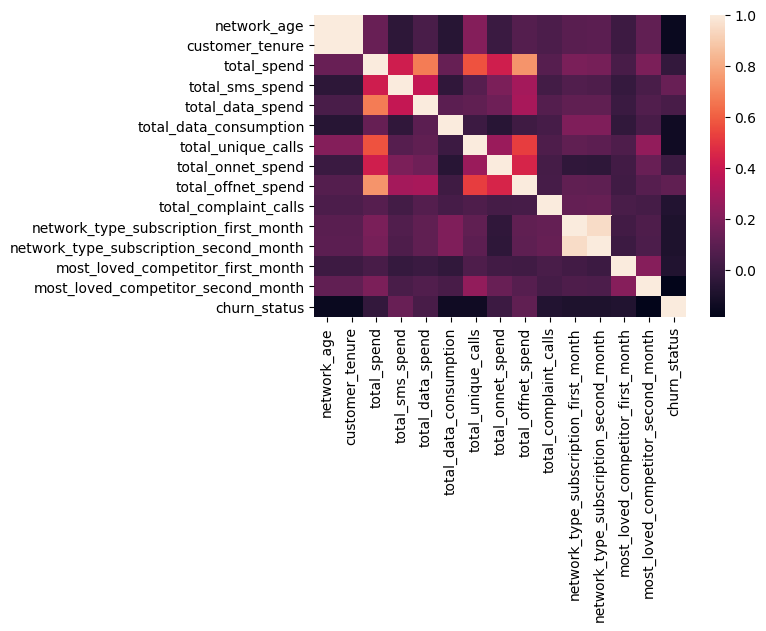

In [19]:
# Visualizing correlations in data
sns.heatmap(df.corr())

In [20]:
# Droping network age because it was not documented, It's also the same with customere_tenure
df = df.drop('network_age', axis=1)

In [21]:
# Other spendings that the custormer has made.
df['other_spend'] = (df['total_spend'] - df['total_data_spend']) - df['total_sms_spend']

In [22]:
# Drop total_data_consumption because total_data_spend provides more info on internet usage.
df = df.drop('total_data_consumption', axis=1)

In [23]:
df.describe()

,customer_tenure,total_spend,total_sms_spend,total_data_spend,total_unique_calls,total_onnet_spend,total_offnet_spend,total_complaint_calls,network_type_subscription_first_month,network_type_subscription_second_month,most_loved_competitor_first_month,most_loved_competitor_second_month,churn_status,other_spend
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,50.393436,834.867153,30.446431,61.382621,212.809484,6789.514143,16124.043261,1.924293,1.273710,1.290349,3.150582,2.413478,0.509151,743.038102
std,42.476090,1308.716712,58.333123,309.525210,313.513515,16433.346260,37729.292479,2.386492,0.820709,0.825120,1.636833,1.174068,0.500124,1102.410556
min,-0.170000,4.910000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.392000
25%,12.317500,164.937500,3.500000,1.250000,19.000000,84.000000,1135.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,123.752500
50%,41.450000,632.092000,14.010000,10.000000,87.000000,1629.000000,4254.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,553.195400
75%,76.400000,1035.400300,31.275000,43.750000,268.750000,7322.250000,13429.250000,2.000000,2.000000,2.000000,4.000000,3.000000,1.000000,958.611000
max,181.700000,24438.830000,665.000000,8295.000000,2596.000000,381174.000000,431440.000000,49.000000,2.000000,2.000000,6.000000,5.000000,1.000000,16159.686000


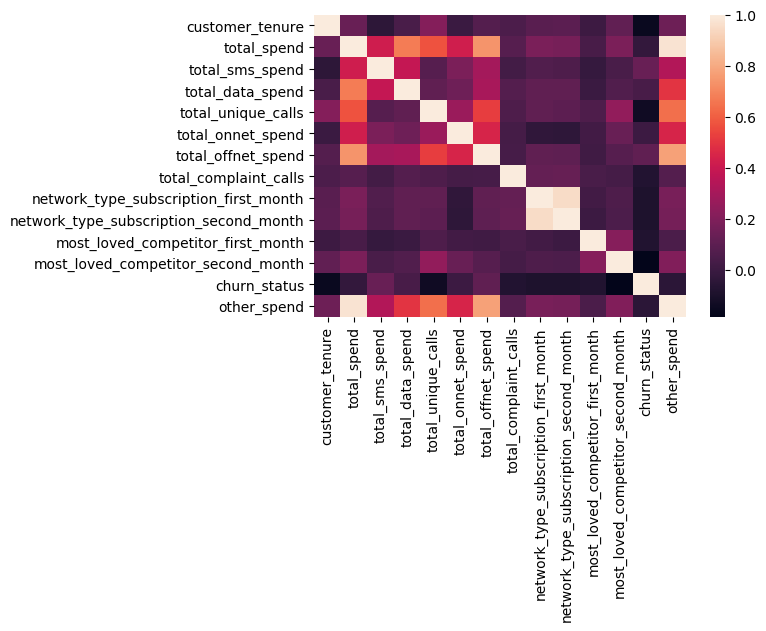

In [24]:
sns.heatmap(df.corr())

### Sperating labels from features.

In [25]:
# Remove target feature from data frame
churn_status = pd.Series(df['churn_status'], dtype='float32')
feature_final = df.drop('churn_status', axis=1)

### Using cross validationg to split train and test data.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature_final,
                                                    churn_status,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [28]:
print "Training set has {} samples.".format(X_train.shape)
print "Testing set has {} samples.".format(y_train.shape)

Training set has (961, 13) samples.
Testing set has (961,) samples.


## Feature Selection

In [29]:
forest = RandomForestClassifier(n_estimators=20, random_state = 0)

In [30]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
importances = forest.feature_importances_

In [32]:
# Hold feature labels for feature selection
feature_labels = feature_final.columns

In [33]:
indices = np.argsort(importances)[::-1]

In [34]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feature_labels[indices[f]], importances[indices[f]]))

 1) total_spend                    0.211179
 2) other_spend                    0.187002
 3) total_sms_spend                0.116163
 4) total_offnet_spend             0.095729
 5) total_unique_calls             0.094609
 6) customer_tenure                0.071317
 7) total_onnet_spend              0.063612
 8) total_data_spend               0.050309
 9) most_loved_competitor_second_month 0.033238
10) total_complaint_calls          0.028141
11) most_loved_competitor_first_month 0.028116
12) network_type_subscription_second_month 0.010423
13) network_type_subscription_first_month 0.010160


*** Making use of the first eight features to train the models and disregarging the last three models because they don't help our models. Furthermore the last three models doesn't show relevant correlation with the rest of the features on the heatmap above. ***

In [35]:
X_train = X_train.drop('most_loved_competitor_second_month', axis=1)
X_train = X_train.drop('total_complaint_calls', axis=1)
X_train = X_train.drop('most_loved_competitor_first_month', axis=1)
X_train = X_train.drop('network_type_subscription_second_month', axis=1)
X_train = X_train.drop('network_type_subscription_first_month', axis=1)

X_test = X_test.drop('most_loved_competitor_second_month', axis=1)
X_test = X_test.drop('total_complaint_calls', axis=1)
X_test = X_test.drop('most_loved_competitor_first_month', axis=1)
X_test = X_test.drop('network_type_subscription_second_month', axis=1)
X_test = X_test.drop('network_type_subscription_first_month', axis=1)

## Testing model performance based on defferent sizes of training data

In [36]:
samples_100 = len(y_train)
samples_10 = int(math.floor((samples_100 * 10) / 100))
samples_1 = int(math.floor((samples_100 * 1) / 100))

print "100 samples is {}".format(samples_100)
print "10 samples is {}".format(samples_10)
print "1 samples is {}".format(samples_1)

100 samples is 961
10 samples is 96
1 samples is 9


In [37]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 

    results['pred_time'] = end - start
    results['acc_train'] = accuracy_score(predictions_train[:300], y_train[:300])
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    results['f_train'] = fbeta_score(predictions_train[:300], y_train[:300], beta=0.5)
    results['f_test'] = fbeta_score(predictions_test, y_test, beta=0.5)
       
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    return results

In [38]:
clf_A = DecisionTreeClassifier()
clf_B = SVC()
clf_C = XGBClassifier()

In [39]:
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 9 samples.
DecisionTreeClassifier trained on 96 samples.
DecisionTreeClassifier trained on 961 samples.
SVC trained on 9 samples.
SVC trained on 96 samples.
SVC trained on 961 samples.
XGBClassifier trained on 9 samples.
XGBClassifier trained on 96 samples.
XGBClassifier trained on 961 samples.


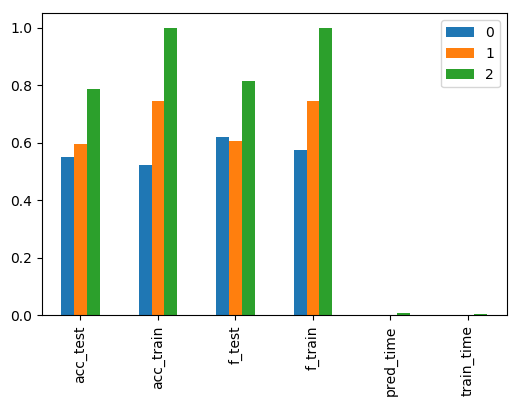

In [40]:
pd.DataFrame(results['DecisionTreeClassifier']).plot.bar()

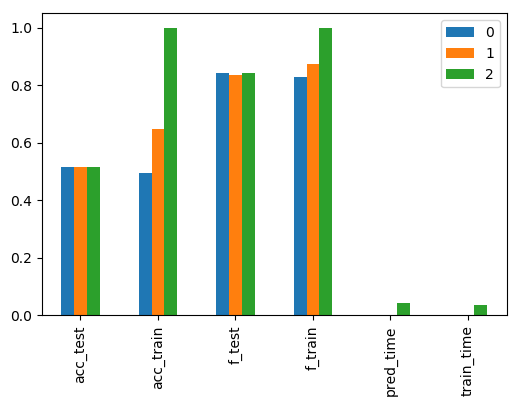

In [41]:
pd.DataFrame(results['SVC']).plot.bar()

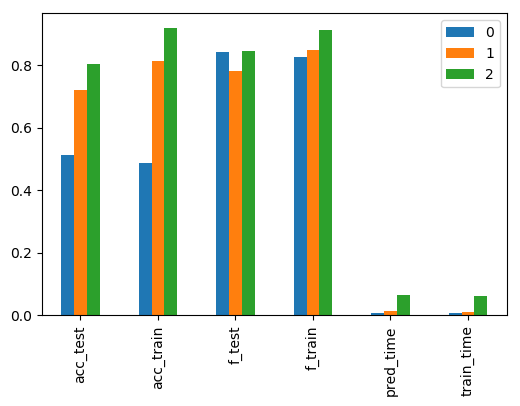

In [42]:
pd.DataFrame(results['XGBClassifier']).plot.bar()

## Using Grid Search CV
To determine the best estimators for the decision tree classifier

In [43]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

params = { 'criterion':['gini', 'entropy'], 'max_depth':range(2, 20), 'random_state': [1] }

def performance_metric(y_true, y_predict):
    score = fbeta_score(y_true, y_predict, beta=0.5)
    return score

def model_grid(clf, parameters):
    result = {}
    
    scorer = make_scorer(performance_metric)
    grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)
    grid_fit = grid_obj.fit(X_train, y_train)

    result['best_estimator_'] = grid_fit.best_estimator_
    result['predictions'] = (clf.fit(X_train, y_train)).predict(X_test)
    result['best_predictions'] = result['best_estimator_'].predict(X_test)
    
    return result

/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [44]:
grid = model_grid(DecisionTreeClassifier(), params)

In [45]:
grid['best_estimator_']

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

## Model Evaluations 

In [62]:
decision_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
decision_clf.fit(X_train, y_train)

decision_clf_predictions_train = decision_clf.predict(X_train)
decision_clf_predictions_test = decision_clf.predict(X_test)


print "F-beta score for decision tree classifier on train {}".format(fbeta_score(decision_clf_predictions_train, y_train, beta=0.5))
print "Accuracy score for decision tree classifier on train {}".format(accuracy_score(decision_clf_predictions_train, y_train))
print ""
print "F-beta score for decision tree classifier on test {}".format(fbeta_score(decision_clf_predictions_test, y_test, beta=0.5))
print "Accuracy score for decision tree classifier on test {}".format(accuracy_score(decision_clf_predictions_test, y_test))

F-beta score for decision tree classifier on train 0.848122162608
Accuracy score for decision tree classifier on train 0.857440166493

F-beta score for decision tree classifier on test 0.802568218299
Accuracy score for decision tree classifier on test 0.788381742739


In [67]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

svc_clf_predictions_train = svc_clf.predict(X_train)
svc_clf_predictions_test = svc_clf.predict(X_test)

print "F-beta score for  svc_classifier on test {}".format(fbeta_score(svc_clf_predictions_test, y_test, beta=0.5))
print "Accuracy score for svc_classifier on test {}".format(accuracy_score(svc_clf_predictions_test, y_test))
print ""
print "F-beta score for svc_classifier on train {}".format(fbeta_score(svc_clf_predictions_train, y_train, beta=0.5))
print "Accuracy score for svc_classifier on train {}".format(accuracy_score(svc_clf_predictions_train, y_train))

F-beta score for  svc_classifier on test 0.841248303935
Accuracy score for svc_classifier on test 0.514522821577

F-beta score for svc_classifier on train 1.0
Accuracy score for svc_classifier on train 1.0


In [68]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_clf_predictions_train = xgb_clf.predict(X_train)
xgb_clf_predictions_test = xgb_clf.predict(X_test)

print "F-beta score for  xgb_classifier on test {}".format(fbeta_score(xgb_clf_predictions_test, y_test, beta=0.5))
print "Accuracy score for xgb_classifier on test {}".format(accuracy_score(xgb_clf_predictions_test, y_test))
print ""
print "F-beta score for xgb_classifier on train {}".format(fbeta_score(xgb_clf_predictions_train, y_train, beta=0.5))
print "Accuracy score for xgb_classifier on train {}".format(accuracy_score(xgb_clf_predictions_train, y_train))

F-beta score for  xgb_classifier on test 0.845181674566
Accuracy score for xgb_classifier on test 0.804979253112

F-beta score for xgb_classifier on train 0.927138763815
Accuracy score for xgb_classifier on train 0.924037460978
